In [30]:
# !pip install networkx
# !pip install matplotlib
# !pip install tqdm

In [2]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations, groupby

## Generating graph

In [3]:
# You can use this function to generate a random graph with 'num_of_nodes' nodes
# and 'completeness' probability of an edge between any two nodes
# If 'directed' is True, the graph will be directed
# If 'draw' is True, the graph will be drawn
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted (in case of undirected graphs)
    """

    
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))
    
    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)
                
    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)
                
    if draw: 
        plt.figure(figsize=(10,6))
        if directed:
            # draw with edge weights
            pos = nx.arf_layout(G)
            nx.draw(G,pos, node_color='lightblue', 
                    with_labels=True,
                    node_size=500, 
                    arrowsize=20, 
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)
            
        else:
            nx.draw(G, node_color='lightblue', 
                with_labels=True, 
                node_size=500)
        
    return G

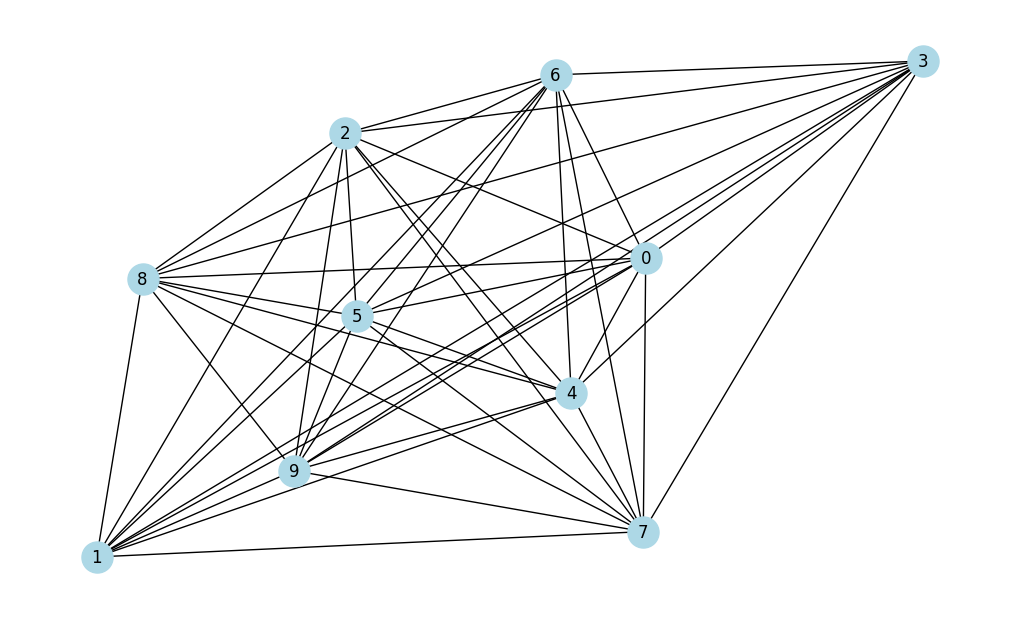

In [53]:
G = gnp_random_connected_graph(10, 1, False, True)

# For Task 1

## Kruskal's algorithm

In [34]:
from networkx.algorithms import tree

In [35]:
mstk = tree.minimum_spanning_tree(G, algorithm="kruskal")

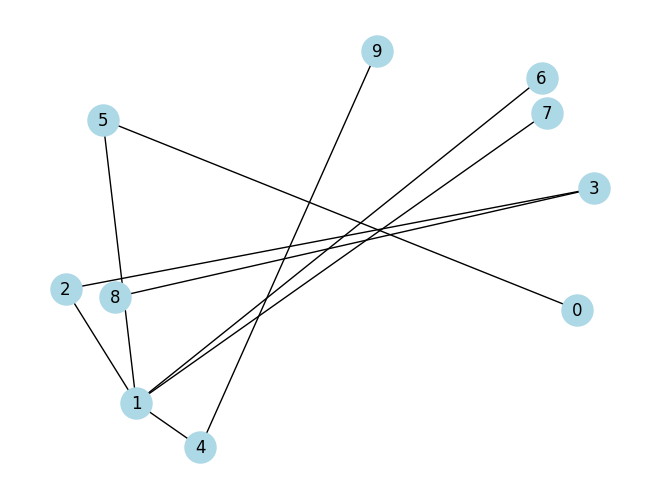

In [36]:
nx.draw(mstk, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

In [37]:
mstk.edges(), len(mstk.edges())

(EdgeView([(0, 5), (1, 2), (1, 7), (1, 5), (1, 4), (1, 6), (2, 3), (3, 8), (4, 9)]),
 9)

## Prim's algorithm

In [38]:
mstp = tree.minimum_spanning_tree(G, algorithm="prim")

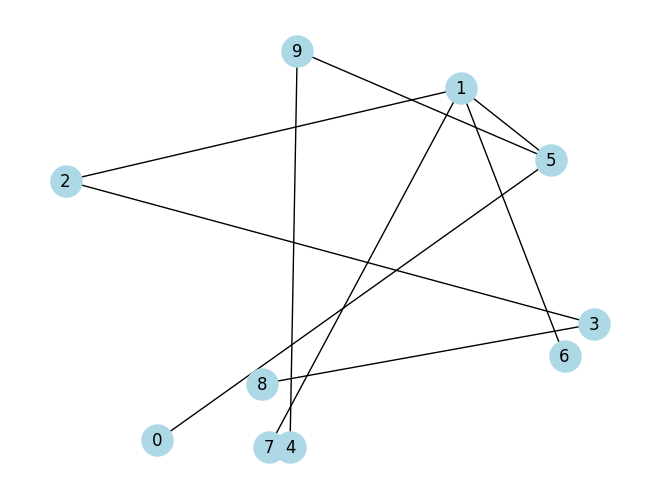

In [39]:
nx.draw(mstp, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

In [40]:
mstp.edges(), len(mstp.edges())

(EdgeView([(0, 5), (1, 5), (1, 2), (1, 7), (1, 6), (2, 3), (3, 8), (4, 9), (5, 9)]),
 9)

# For Task 2

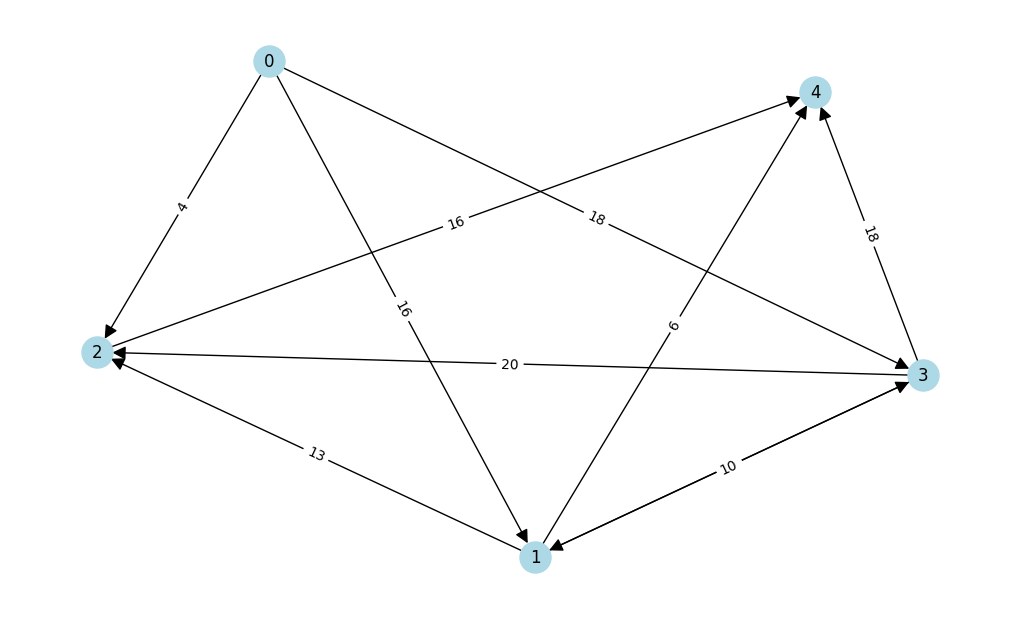

In [15]:
G = gnp_random_connected_graph(5, 0.5, True, True)

## Bellman-Ford algorithm

In [16]:
from networkx.algorithms import bellman_ford_predecessor_and_distance

In [17]:
# pred is a dictionary of predecessors, dist is a dictionary of distances
try:
    pred, dist = bellman_ford_predecessor_and_distance(G, 0)
    for k, v in dist.items():
        print(f"Distance to {k}:", v)
except:
    print("Negative cycle detected")

Distance to 0: 0
Distance to 2: 4
Distance to 1: 16
Distance to 3: 18
Distance to 4: 20


In [ ]:
#У функції Bellman_Ford_algorithm ми реалізували алгоритм Белмана-Форда. Спочатку ми знайшли загальну кількість вершин,
#а потім створили список з відстанями від кожної вершини до початкової вершини, спочатку це нескінченність. Потім ми задали відстань до початкової вершини 0(по дефолту першою вершиною ми обрали 0)
#Перший цикл for здійснює V-1(V - кількість вершин у графі) ітерацій. У цьому циклі для кожного ребра перевіряється, чи можливо зменшити відстань до кінцевої вершини, оновлюючи значення відстані, 
#якщо відстань до початкової вершини плюс вага ребра менше поточної відстані до кінцевої вершини. Наступний цикл відповідає за перевірку на наявність від'ємного циклу.
#Для цього знову перевіряємо кожне ребро, і якщо для будь-якого ребра можна зменшити відстань, то повертається повідомлення, що знайдено від'ємний цикл. Останнім циклом ми просто виводимо
#результат виконаного алгоритму


In [18]:
def Bellman_Ford_algorithm(edges=list(G.edges(data=True)), first_node=0):
    num_nodes = max(max(edge[0], edge[1]) for edge in edges) + 1
    distance = [float('inf')] * num_nodes
    distance[first_node] = 0
    summary=''
    for _ in range(num_nodes - 1):
        for source, dest, edge_data in edges:
            weight = edge_data['weight']
            if distance[dest] > distance[source] + weight:
                distance[dest] = distance[source] + weight
    for source, dest, edge_data in edges:
        weight = edge_data['weight']
        if distance[dest] > distance[source] + weight:
            return "Negative cycle detected"
    for k, v in enumerate(distance):
        summary += f"Distance to {k}: {v}\n"
    return summary
print(Bellman_Ford_algorithm())

Distance to 0: 0
Distance to 1: 16
Distance to 2: 4
Distance to 3: 18
Distance to 4: 20



## Floyd-Warshall algorithm

In [21]:
from networkx.algorithms import floyd_warshall_predecessor_and_distance

In [24]:
# pred is a dictionary of predecessors, dist is a dictionary of distances dictionaries
try:
    pred, dist = floyd_warshall_predecessor_and_distance(G) 
    for k, v in dist.items():
        print(f"Distances with {k} source:", dict(v))
        #print(pred)
except:
    print("Negative cycle detected")

Distances with 0 source: {0: 0, 2: 4, 1: 16, 3: 18, 4: 20}
Distances with 1 source: {1: 0, 2: 13, 3: 18, 4: 6, 0: inf}
Distances with 2 source: {2: 0, 4: 16, 0: inf, 1: inf, 3: inf}
Distances with 3 source: {3: 0, 1: 10, 2: 20, 4: 16, 0: inf}
Distances with 4 source: {4: 0, 0: inf, 1: inf, 2: inf, 3: inf}


In [20]:
#У функції Floyd_Warshall_algorithm ми реалізували алгоритм Флойда-Воршала. Спочатку ми знайшли загальну кількість вершин,
#а потім створили словник distances_with_source, який буде зберігати відстані для кожної вершини. Далі ми заходимо в зовнішній цикл, 
# в якому ми визначаємо вершину яку обробляємо(ми проходитемося по абсолютно всіх вершинах) і записуємо відстань від цієї вершини до себе самої як 0.
# Дальше нашим внутрішнім циклом ми встановлюємо відстань від нашої вершини до суміжних, а потім іфкою перевіряємо чи нашу поточну відстань не можна скоротити, 
# якщо так, то перезаписуємо нашу відстань, по завершенню циклу для кожної вихідної вершини зберігається словник distance, який містить відстані до всіх вершин від цієї вихідної вершини.
# Далі перевіряємо на негативний цикл по тому ж принципу, що і в попередньому алгоритмі і так само виводимо результат.

SyntaxError: invalid syntax (3418597046.py, line 3)

In [23]:
def Floyd_Warshall_algorithm(edges=list(G.edges(data=True))):
    num_nodes = max(max(edge[0], edge[1]) for edge in edges) + 1
    distances_with_source = {}
    summary=''
    for source in range(num_nodes):
        distance = {node: float('inf') for node in range(num_nodes)}
        distance[source] = 0
        for _ in range(num_nodes - 1):
            for source_node, dest_node, edge_data in edges:
                weight = edge_data['weight']
                if distance[dest_node] > distance[source_node] + weight:
                    distance[dest_node] = distance[source_node] + weight
        distances_with_source[source] = distance
        for source_node, dest_node, edge_data in edges:
            weight = edge_data['weight']
            if distance[dest_node] > distance[source_node] + weight:
                return "Negative cycle detected"
    for source, dist in distances_with_source.items():
        dist_str = ', '.join([f"{node}: {dist}" for node, dist in dist.items()])
        summary+=f"Distances with {source} source: {{{dist_str}}}\n"
    return summary
print(Floyd_Warshall_algorithm())

Distances with 0 source: {0: 0, 1: 16, 2: 4, 3: 18, 4: 20}
Distances with 1 source: {0: inf, 1: 0, 2: 13, 3: 18, 4: 6}
Distances with 2 source: {0: inf, 1: inf, 2: 0, 3: inf, 4: 16}
Distances with 3 source: {0: inf, 1: 10, 2: 20, 3: 0, 4: 16}
Distances with 4 source: {0: inf, 1: inf, 2: inf, 3: inf, 4: 0}



## Some useful explanations

### How to get list of edges for your algorithm

In [46]:
edges = list(G.edges()) # by default G.edges are EdgesView class

In [47]:
edges[:5]

[(0, 2), (0, 5), (0, 6), (0, 7), (0, 8)]

### To get edges with weights

In [48]:
edges = list(G.edges(data=True))

In [49]:
edges[:5]

[(0, 2, {'weight': 17}),
 (0, 5, {'weight': 19}),
 (0, 6, {'weight': 8}),
 (0, 7, {'weight': 17}),
 (0, 8, {'weight': -5})]

In [50]:
nodes = list(G.nodes())
print(nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


## Example on time measuring

Read more on this: https://realpython.com/python-timer/

Recall that you should measure times for 5, 10, 20, 50, 100, 200, 500 nodes 1000 times (and take mean of time taken for each node amount).

Then you should build the plot for two algorithms (x - data size, y - mean time of execution).

In [51]:
import time
from tqdm import tqdm

In [52]:
NUM_OF_ITERATIONS = 1000
time_taken = 0
for i in tqdm(range(NUM_OF_ITERATIONS)):
    
    # note that we should not measure time of graph creation
    G = gnp_random_connected_graph(100, 0.4, False)
    
    start = time.time()
    tree.minimum_spanning_tree(G, algorithm="prim")
    end = time.time()
    
    time_taken += end - start

time_taken / NUM_OF_ITERATIONS

  0%|          | 0/1000 [00:00<?, ?it/s]

0.00309446382522583